In [72]:
import numpy as np
from matplotlib import pyplot as plt

In [134]:
beta = 0.8
gamma = 0
reset = False
def input_trans(x):
    return np.exp(x)*(1-beta)


#ix = (np.array([0, -1, 1, 1, 0, -1, 1, 1, 0, 1])*0.5).tolist()
ix = (np.array([1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1,])*0.5).tolist()

In [135]:
decay_pairs = []
input_pairs = []
reset_pairs = []
thr = [1]
thr_x = [0]
#thr missing
t = 0
mem = 0
add_thr = 0

for i in range(len(ix)):
    decay_pairs.append(([t, t+0.5], [mem, mem*beta]))
    mem *= beta
    inp = input_trans(ix[i])
    input_pairs.append(([t+0.5, t+1],[mem, mem+inp]))
    #print(mem, inp)
    mem += inp
    t += 1
    old_thr = 1+add_thr
    add_thr *= beta
    thr.append(1+add_thr)
    thr_x.append(t+0.2)
    if mem >= old_thr and reset:
        reset_pairs.append(([t,t], [mem, mem-old_thr]))
        mem -= old_thr
        add_thr += gamma
        thr.append(1+add_thr)
        thr_x.append(t+0.2)



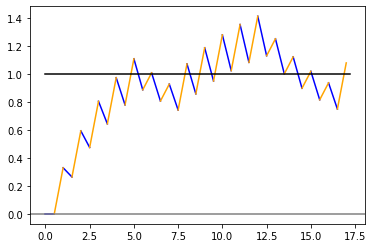

In [136]:
for dp in decay_pairs:
    plt.plot(dp[0], dp[1], color='blue')

for dp in input_pairs:
    #print(dp[0], dp[1])
    plt.plot(dp[0], dp[1], color='orange')

for dp in reset_pairs:
    plt.plot(dp[0], dp[1], color='green')

plt.axhline(0, c='grey')
plt.plot(thr_x, thr, color='black')

In [137]:
for dp in decay_pairs:
    print(f"\draw[blue] {dp[0][0], dp[1][0]} -- {dp[0][1], dp[1][1]};")



for dp in input_pairs:
    print(f"\draw[orange] {dp[0][0], dp[1][0]} -- {dp[0][1], dp[1][1]};")


for dp in reset_pairs:
    print(f"\draw[green] {dp[0][0], dp[1][0]} -- {dp[0][1], dp[1][1]};")

\draw[blue] (0, 0) -- (0.5, 0.0);
\draw[blue] (1, 0.32974425414002556) -- (1.5, 0.26379540331202045);
\draw[blue] (2, 0.593539657452046) -- (2.5, 0.4748317259616368);
\draw[blue] (3, 0.8045759801016623) -- (3.5, 0.6436607840813299);
\draw[blue] (4, 0.9734050382213555) -- (4.5, 0.7787240305770844);
\draw[blue] (5, 1.10846828471711) -- (5.5, 0.886774627773688);
\draw[blue] (6, 1.0080807597162147) -- (6.5, 0.8064646077729718);
\draw[blue] (7, 0.9277707397154984) -- (7.5, 0.7422165917723987);
\draw[blue] (8, 1.0719608459124244) -- (8.5, 0.8575686767299395);
\draw[blue] (9, 1.187312930869965) -- (9.5, 0.9498503446959721);
\draw[blue] (10, 1.2795945988359976) -- (10.5, 1.0236756790687982);
\draw[blue] (11, 1.3534199332088237) -- (11.5, 1.082735946567059);
\draw[blue] (12, 1.4124802007070845) -- (12.5, 1.1299841605656675);
\draw[blue] (13, 1.2512902925081941) -- (13.5, 1.0010322340065554);
\draw[blue] (14, 1.122338365949082) -- (14.5, 0.8978706927592657);
\draw[blue] (15, 1.0191768247017923) 

In [125]:
import torch
data = torch.cat((torch.tensor(thr_x).view(-1,1), torch.tensor(thr).view(-1,1)), dim=1).tolist()

import csv
with open('../export/thr_new.csv', 'w') as csvfile: #, newline=''
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(data)